<a href="https://colab.research.google.com/github/magickoo/Tensorflow-Deep-Learning/blob/main/03_Convolutional_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Convolutional Neural Networks


import the data

In [1]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2024-08-03 11:29:24--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.207, 142.251.2.207, 74.125.137.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M   144MB/s    in 0.7s    

2024-08-03 11:29:25 (144 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



Inspect the data

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train

pizza  steak


**Dataset Information**

In [4]:
import os
for dirpath, dirnames , filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


Class names

In [5]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [6]:
#Train folder
pizza_images_train = len(os.listdir("pizza_steak/train/pizza"))
pizza_images_train
steak_images_train =len(os.listdir("pizza_steak/train/steak"))
print("Train")
print("Pizza: ",pizza_images_train)
print("Steak: ",steak_images_train)

Train
Pizza:  750
Steak:  750


In [7]:
#Test folder
pizza_images_test = len(os.listdir("pizza_steak/test/pizza"))
steak_images_test =len(os.listdir("pizza_steak/test/steak"))
print("Test")
print("Pizza: ",pizza_images_test)
print("Steak: ",steak_images_test)

Test
Pizza:  250
Steak:  250


Visualize

In [8]:
#Function to view an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  target_folder = target_dir + target_class

  #Get a  random image path
  random_image = random.sample(os.listdir(target_folder),1)

  # Read in the image and plot it
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  #plt.axis("off")

  print(f"Image shape: {img.shape}") #image shape

  return img

Image shape: (384, 512, 3)


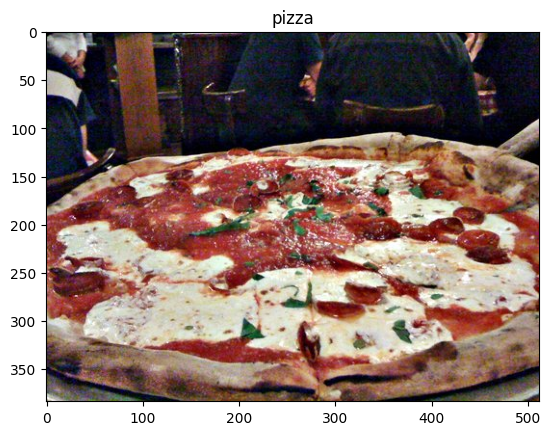

In [9]:
#pizza image
pizza_image= view_random_image(target_dir= "pizza_steak/train/",target_class= "pizza")

array([[[  0,   7,  17],
        [  0,   6,  16],
        [  0,   2,  15],
        ...,
        [ 26,  48,  35],
        [ 32,  57,  28],
        [ 21,  49,  11]],

       [[  0,   1,   7],
        [  0,   1,   9],
        [  0,   4,  16],
        ...,
        [ 23,  43,  32],
        [ 29,  52,  32],
        [ 27,  51,  25]],

       [[  0,   2,   0],
        [  1,   1,   0],
        [  1,   0,   9],
        ...,
        [ 18,  35,  29],
        [ 22,  38,  37],
        [ 25,  44,  42]],

       ...,

       [[209, 207, 194],
        [239, 237, 225],
        [255, 255, 250],
        ...,
        [ 70,  43,  32],
        [ 77,  47,  39],
        [ 92,  59,  52]],

       [[169, 166, 151],
        [187, 184, 169],
        [232, 229, 214],
        ...,
        [ 85,  50,  22],
        [102,  61,  39],
        [105,  62,  43]],

       [[167, 161, 145],
        [147, 141, 125],
        [187, 182, 163],
        ...,
        [ 84,  46,   7],
        [111,  66,  37],
        [102,  55,  29]]], dtype=uint8)
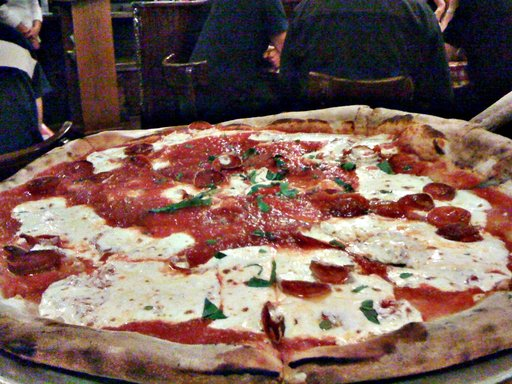

In [10]:
pizza_image

Image shape: (382, 512, 3)


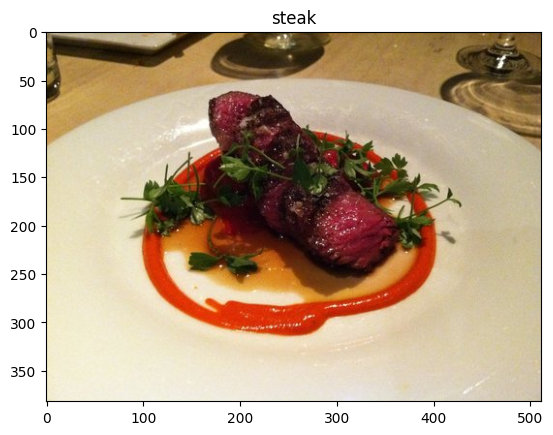

In [11]:
#steak image
steak_image= view_random_image(target_dir= "pizza_steak/train/",target_class= "steak")

In [12]:
import tensorflow as tf
tf.constant(pizza_image)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[  0,   7,  17],
        [  0,   6,  16],
        [  0,   2,  15],
        ...,
        [ 26,  48,  35],
        [ 32,  57,  28],
        [ 21,  49,  11]],

       [[  0,   1,   7],
        [  0,   1,   9],
        [  0,   4,  16],
        ...,
        [ 23,  43,  32],
        [ 29,  52,  32],
        [ 27,  51,  25]],

       [[  0,   2,   0],
        [  1,   1,   0],
        [  1,   0,   9],
        ...,
        [ 18,  35,  29],
        [ 22,  38,  37],
        [ 25,  44,  42]],

       ...,

       [[209, 207, 194],
        [239, 237, 225],
        [255, 255, 250],
        ...,
        [ 70,  43,  32],
        [ 77,  47,  39],
        [ 92,  59,  52]],

       [[169, 166, 151],
        [187, 184, 169],
        [232, 229, 214],
        ...,
        [ 85,  50,  22],
        [102,  61,  39],
        [105,  62,  43]],

       [[167, 161, 145],
        [147, 141, 125],
        [187, 182, 163],
        ...,
        [ 84,  46,   

In [13]:
pizza_image.shape

(384, 512, 3)

In [14]:
## Normalize the image (get all pixel values between 0 and 1)
pizza_image/255.

array([[[0.        , 0.02745098, 0.06666667],
        [0.        , 0.02352941, 0.0627451 ],
        [0.        , 0.00784314, 0.05882353],
        ...,
        [0.10196078, 0.18823529, 0.1372549 ],
        [0.1254902 , 0.22352941, 0.10980392],
        [0.08235294, 0.19215686, 0.04313725]],

       [[0.        , 0.00392157, 0.02745098],
        [0.        , 0.00392157, 0.03529412],
        [0.        , 0.01568627, 0.0627451 ],
        ...,
        [0.09019608, 0.16862745, 0.1254902 ],
        [0.11372549, 0.20392157, 0.1254902 ],
        [0.10588235, 0.2       , 0.09803922]],

       [[0.        , 0.00784314, 0.        ],
        [0.00392157, 0.00392157, 0.        ],
        [0.00392157, 0.        , 0.03529412],
        ...,
        [0.07058824, 0.1372549 , 0.11372549],
        [0.08627451, 0.14901961, 0.14509804],
        [0.09803922, 0.17254902, 0.16470588]],

       ...,

       [[0.81960784, 0.81176471, 0.76078431],
        [0.9372549 , 0.92941176, 0.88235294],
        [1.        , 1

## Lets Build cnn to find patterns in our image
* Load our images
* Preprocess our images
* Build a cnn to find pattern in our data
* Compile our cnn
* Fit our cnn to the training data

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from keras.applications import ImageDataGenerator
tf.random.set_seed(42)

# Preprocess Data (scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup path for data directory
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        validation_data=valid_data,
                        verbose=1)  # Set verbose to 1 for detailed output


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 113s 2s/step - loss: 0.5426 - accuracy: 0.7193 - val_loss: 0.4074 - val_accuracy: 0.8280
Epoch 2/5
21/47 [============>.................] - ETA: 55s - loss: 0.4104 - accuracy: 0.8204

KeyboardInterrupt: 

In [16]:
len(train_data)

47

In [ ]:
1500/32

In [ ]:
model_1.summary()

In [ ]:
train_data

We can use all of the same parameters in our previous model except for changing two things:

The data - we're now working with images instead of dots.

1) The input shape - we have to tell our neural network the shape of the images we're working with.

2) In our case, we'll resize the images to (224, 224, 3), meaning a height and width of 224 pixels and a depth of 3 for the red, green, blue colour channels.

In [17]:

# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data, # use same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # use same validation data created above
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 139ms/step - loss: 0.9156 - accuracy: 0.4967 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 5s 114ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 6s 134ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 5s 113ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 11s 226ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model similar to model_1 but add an extra layer and increase the number of hidden units in each layer
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(100, activation='relu'), # increase number of neurons from 4 to 100 (for each layer)
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'), # add an extra layer
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

In [ ]:
# Check out model_3 architecture
model_3.summary()

### Binary Classification

Image shape: (512, 512, 3)
Image shape: (512, 384, 3)


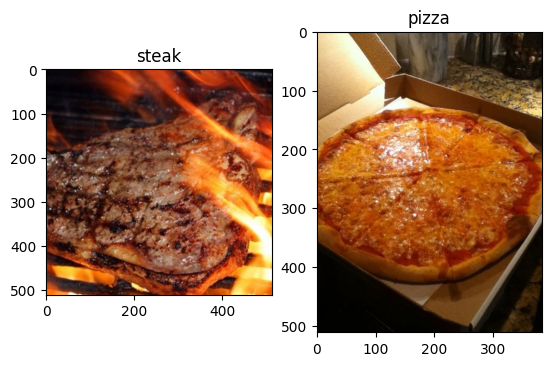

In [18]:

# Visualize data (requires function 'view_random_image' above)
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

## Preprocess the data

In [19]:
# Define training and test directory paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [20]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [21]:

# Turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [22]:
# Get a sample of the training data batch
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [23]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.1137255 , 0.11764707, 0.18823531],
          [0.1137255 , 0.11764707, 0.18823531],
          [0.10980393, 0.1137255 , 0.18431373],
          ...,
          [0.9607844 , 0.9450981 , 0.9490197 ],
          [0.8313726 , 0.81568635, 0.8196079 ],
          [0.9843138 , 0.9686275 , 0.9725491 ]],
 
         [[0.12156864, 0.1254902 , 0.19607845],
          [0.1254902 , 0.12941177, 0.20000002],
          [0.10196079, 0.10588236, 0.1764706 ],
          ...,
          [0.9333334 , 0.92549026, 0.9294118 ],
          [0.909804  , 0.90196085, 0.9058824 ],
          [0.9960785 , 0.98823535, 0.9921569 ]],
 
         [[0.09803922, 0.10196079, 0.17254902],
          [0.10588236, 0.10980393, 0.18039216],
          [0.1254902 , 0.13333334, 0.19215688],
          ...,
          [0.8000001 , 0.79215693, 0.7960785 ],
          [0.909804  , 0.90196085, 0.9058824 ],
          [1.        , 0.9960785 , 1.        ]],
 
         ...,
 
         [[0.09803922, 0.07843138, 0.09411766],
          [0.07843

In [24]:

# View the first batch of labels
labels

array([0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1.],
      dtype=float32)

## Create a model

In [25]:

# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [26]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_4 = Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         strides=1,
         padding='valid',
         activation='relu',
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') # output layer (specify output shape)
])

In [27]:
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

## Fit the Model

In [28]:

# Check lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [29]:

# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 137s 3s/step - loss: 0.8096 - accuracy: 0.6900 - val_loss: 0.4300 - val_accuracy: 0.8080
Epoch 2/5
47/47 [==============================] - 125s 3s/step - loss: 0.4187 - accuracy: 0.8193 - val_loss: 0.4138 - val_accuracy: 0.8100
Epoch 3/5
47/47 [==============================] - 124s 3s/step - loss: 0.2801 - accuracy: 0.8893 - val_loss: 0.4180 - val_accuracy: 0.7920
Epoch 4/5
47/47 [==============================] - 124s 3s/step - loss: 0.1825 - accuracy: 0.9367 - val_loss: 0.4013 - val_accuracy: 0.7960
Epoch 5/5
47/47 [==============================] - 123s 3s/step - loss: 0.0767 - accuracy: 0.9787 - val_loss: 0.4964 - val_accuracy: 0.8100


In [30]:
# Check out our model's architecture
model_4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_2 (Flatten)         (None, 475240)            0         
                                                                 
 dense_4 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


## Evaluate the Model

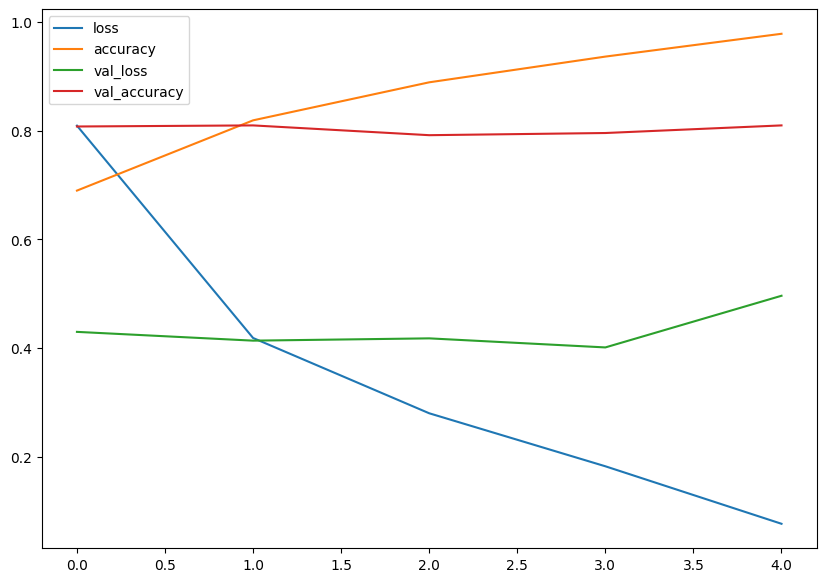

In [31]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

In [32]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

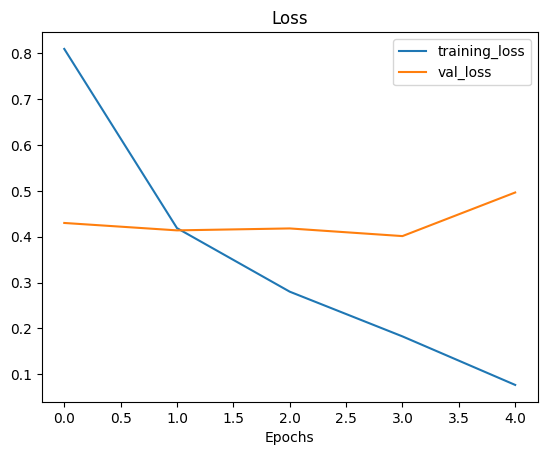

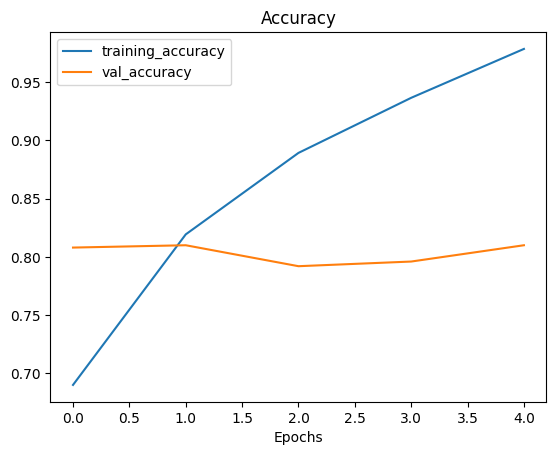

In [33]:
# Check out the loss curves of model_4
plot_loss_curves(history_4)

#### the idea position for curves is to be follow each other


## adjuct model paramrers
Input -> Conv layers + ReLU layers (non-linearities) + Max Pooling layers -> Fully connected (dense layer) as Output

In [34]:
#A ConvNet with max pooling

# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

In [35]:
# Compile model (same as model_4)
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [36]:

# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 56s 1s/step - loss: 0.6286 - accuracy: 0.6473 - val_loss: 0.5160 - val_accuracy: 0.7720
Epoch 2/5
47/47 [==============================] - 53s 1s/step - loss: 0.4887 - accuracy: 0.7780 - val_loss: 0.3793 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 54s 1s/step - loss: 0.4270 - accuracy: 0.8113 - val_loss: 0.3562 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 52s 1s/step - loss: 0.4184 - accuracy: 0.8153 - val_loss: 0.3539 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 52s 1s/step - loss: 0.3832 - accuracy: 0.8387 - val_loss: 0.3846 - val_accuracy: 0.8380


## data augmentation

In [37]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [39]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: lab

AttributeError: 'ImageDataGenerator' object has no attribute 'next'

In [ ]:
# Show original image and augmented image
random_number = random.randint(0, 31) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [ ]:
# Create the model (same as model_5)
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

In [ ]:
# Check model's performance history training on augmented data
plot_loss_curves(history_6)

In [ ]:
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data (

In [ ]:
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data (

In [ ]:
Create the model (same as model_5 and model_6)
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

In [ ]:
# Check model's performance history training on augmented data
plot_loss_curves(history_7)

In [ ]:
# Create a CNN model (same as Tiny VGG but for binary classification - https://poloclub.github.io/cnn-explainer/ )
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # same input shape as our images
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

In [ ]:
# Check out the TinyVGG model performance
plot_loss_curves(history_8)

In [ ]:
# How does this training curve look compared to the one above?
plot_loss_curves(history_1)

### Make predictions with trained ddata

In [ ]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
# Check the shape of our image
steak.shape

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak


In [ ]:
# Add an extra axis
print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis=0) # add an extra dimension at axis 0
#steak = steak[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'
print(f"Shape after new dimension: {steak.shape}")
steak

In [ ]:
# Make a prediction on custom image tensor
pred = model_8.predict(steak)
pred

In [ ]:
#for binary c lassification
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [ ]:
# Test our model on a custom image
pred_and_plot(model_8, "03-steak.jpeg", class_names)

In [ ]:
# Download another test image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_8, "03-pizza-dad.jpeg", class_names)